In [1]:
import pandas as pd
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')
import math
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier,HistGradientBoostingRegressor,GradientBoostingRegressor 
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# TRAIN DATASET CLEANING

In [3]:
train_dataset = pd.read_csv('diamonds_train.csv', index_col=0)


In [4]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [5]:
train_dataset.shape

(40345, 10)

In [6]:
train_dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
train_dataset.describe()

# I see that length,width and depth have value 0 in some rows, what doesnt make sense to me and I decide to remove 

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


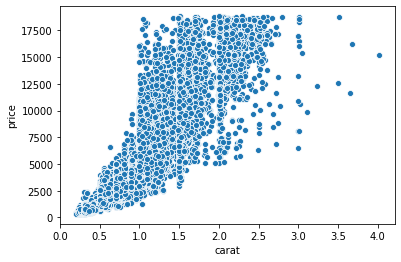

In [8]:
sns.scatterplot(x="carat",y="price",data=train_dataset)

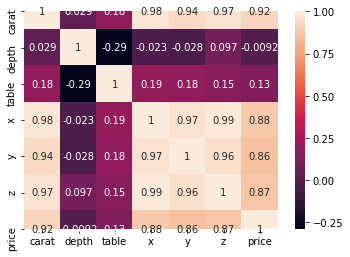

In [9]:
corr = train_dataset.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [10]:
# columns x,y anz z are highly correlated. I decide to remove them

In [11]:
train_dataset.drop(['x','y','z'], axis=1, inplace= True)
#df.head()

In [12]:
# CUT COLUMN
train_dataset.cut.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

In [13]:
train_dataset.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [14]:
cut=('Good','Fair','Very Good','Premium','Ideal')

train_dataset["cut"]=pd.Categorical(train_dataset.cut,ordered=True,categories=cut)
train_dataset['cut_c'] = train_dataset.cut.cat.codes



In [15]:
color=('J', 'H', 'I','E','G','F','D')

train_dataset["color"]=pd.Categorical(train_dataset.color,ordered=True,categories=color)
train_dataset['color_c'] = train_dataset.color.cat.codes

In [16]:
clarity=("I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1","IF")

train_dataset["clarity"]=pd.Categorical(train_dataset.clarity,ordered=True,categories=clarity)
train_dataset['clarity_c'] = train_dataset.clarity.cat.codes

In [17]:
train_dataset.drop(['cut','color','clarity'], inplace = True, axis=1)


In [18]:
train_dataset

,carat,depth,table,price,cut_c,color_c,clarity_c
0,1.21,63.0,57.0,6134,4,1,3
1,0.28,64.0,56.0,532,2,6,5
2,0.42,61.2,58.0,1103,3,5,4
3,0.26,61.1,57.0,600,4,1,7
4,1.10,63.4,57.0,4997,0,4,2
...,...,...,...,...,...,...,...
40340,1.55,61.3,61.0,11708,3,1,3
40341,0.36,60.6,56.0,619,4,6,2
40342,0.57,62.2,55.0,1267,2,2,3
40343,1.01,59.6,62.0,9965,2,5,7


In [19]:
# NOT NULL VALUES
train_dataset.isnull().sum()

carat        0
depth        0
table        0
price        0
cut_c        0
color_c      0
clarity_c    0
dtype: int64

In [20]:
train_dataset.columns

Index(['carat', 'depth', 'table', 'price', 'cut_c', 'color_c', 'clarity_c'], dtype='object')

In [21]:
X = train_dataset[['carat', 'depth', 'table', 'cut_c', 'color_c', 'clarity_c']]
y=train_dataset['price']


In [22]:
print(X.shape, y.shape)

(40345, 6) (40345,)


In [23]:
train_dataset.to_csv('diamonds_train_cleaned.csv')


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TEST DATASET CLEANING

In [26]:
test = pd.read_csv('diamonds_test.csv', index_col=0)


In [27]:
cut=('Good','Fair','Very Good','Premium','Ideal')

test["cut"]=pd.Categorical(test.cut,ordered=True,categories=cut)
test['cut_c'] = test.cut.cat.codes

In [28]:
color=('J', 'H', 'I','E','G','F','D')

test["color"]=pd.Categorical(test.color,ordered=True,categories=color)
test['color_c'] = test.color.cat.codes

In [29]:
clarity=("I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1","IF")

test["clarity"]=pd.Categorical(test.clarity,ordered=True,categories=clarity)
test['clarity_c'] = test.clarity.cat.codes

In [30]:
test

,carat,cut,color,clarity,depth,table,x,y,z,cut_c,color_c,clarity_c
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65,4,1,1
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79,4,6,7
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56,2,2,3
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68,4,1,3
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63,0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
13444,1.05,Ideal,F,SI2,60.3,55.0,6.55,6.68,3.99,4,5,1
13445,0.27,Very Good,G,VS1,61.9,56.0,4.13,4.16,2.56,2,4,4
13446,1.50,Premium,D,VS2,61.8,60.0,7.30,7.37,4.53,3,6,3
13447,1.70,Premium,F,SI2,60.2,61.0,7.79,7.68,4.66,3,5,1


In [31]:
test.drop(['cut','color','clarity'], inplace = True, axis=1)


In [32]:
test.drop(['x','y','z'], axis=1, inplace= True)


In [33]:
test.to_csv('test_dataset_cleaned')

# FIRST MODELS OBSERVATION 

In [34]:
models = {
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "HistGradientBoostingRegressor" :HistGradientBoostingRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(n_estimators=100), 
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)

Training model: GradientBoostingRegressor
Training model: KNeighborsRegressor
Training model: HistGradientBoostingRegressor
Training model: RandomForestRegressor


In [35]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        print(f"Evaluating model {name}")
        printMetric("RSME",math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)))

    except:
        print("Error")

Evaluating model GradientBoostingRegressor
	 RSME: 663.991
Evaluating model KNeighborsRegressor
	 RSME: 1961.058
Evaluating model HistGradientBoostingRegressor
	 RSME: 557.497
Evaluating model RandomForestRegressor
	 RSME: 579.757


## RANDOM FOREST

In [36]:
model=RandomForestRegressor(n_estimators=250)

In [37]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred.shape

(8069,)

In [40]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

576.6755541577392

In [41]:
y_pred2=model.predict(test)

In [42]:
y_pred2

array([  437.33066667,  1873.40706667,  9412.00266667, ...,
       14933.471     , 10270.324     ,   749.76409524])

In [43]:
y_pred3=model.predict(X[:8069])

In [44]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3))

5547.800680794261

# -------------------------------------------------------------------------------------------

In [45]:
params = { 'n_estimators':[1500,1750],
           'min_samples_split':[50, 100],
           'min_samples_leaf': [50, 100]}

tuning_gradient = GridSearchCV(estimator=RandomForestRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1,max_features='sqrt', random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5)

#tuning_gradient.fit(X_train,y_train)

In [46]:
tuning_gradient.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=4,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=10,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=4,
      

In [47]:
RandomForestRegressor.get_params(RandomForestRegressor).keys()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:
y_pred = tuning_gradient.predict(X_test)


In [49]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

1766.9918299887738

In [50]:
y_pred2=tuning_gradient.predict(test)

In [51]:
y_pred3=tuning_gradient.predict(X[:8069])

In [52]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3))

4769.83721099453

# ----------------------------------------------------------------------------------------

In [53]:
model=RandomForestRegressor(n_estimators=300)

In [54]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred = model.predict(X_test)

In [56]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

576.7133968534849

In [57]:
y_pred2=model.predict(test)

In [58]:
y_pred3=model.predict(X[:8069])

In [59]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3))

5548.172454606542

In [60]:
#math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

# ----------------------------------------------------------------------------------------

In [61]:
#param_grid = {'n_estimators': [25,50,75,100], 
#                  'max_depth': [10,15,20,30]}
# Create a based model
#rf = RandomForestRegressor()
# Instantiate the grid search model
#a = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

# ----------------------------------------------------------------------------------------

In [62]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [63]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 15.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
y_pred = grid_search.predict(X_test)


In [65]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))

579.6535113061657

In [66]:
y_pred3 = grid_search.predict(X[:8069])


In [67]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred3))

5520.644547513266

In [68]:
y_pred2 = grid_search.predict(test)


# -------------------------------------------------------------------------------------------

In [69]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)


In [70]:
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [71]:
y_pred4 = RF.predict(X_test)


In [72]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred4))

5520.644547513266

In [73]:
y_pred5 = RF.predict(X[:8069])


In [74]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred5))

5543.95499959326

In [75]:
y_pred6 = RF.predict(test)


# -------------------------------------------------------------------------------------------

In [76]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [77]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [78]:
y_pred7 = regressor.predict(X_test)

In [79]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred7))

717.6380342780408

In [80]:
y_pred8= regressor.predict(X[:8069])


In [81]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred8))

5580.392664222578

In [82]:
y_pred9= regressor.predict(test)


# HistGradientBoostingRegressor

In [83]:
model=GradientBoostingRegressor(n_estimators=250,max_depth=30, min_samples_split=2)

In [84]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=30,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
y_pred10 = model.predict(X_test)

In [86]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred10))

705.1606020848911

In [87]:
y_pred11= model.predict(X[:8069])

In [88]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred11))

5579.681831370333

In [89]:
y_pred12 = model.predict(test)

# ----------------------------------------------------------------------------------------

In [90]:
RF = RandomForestRegressor(random_state=55, n_jobs=-1)


In [91]:
parameter_grid = {'n_estimators': [25,50,75,100], 
                  'max_depth': [10,15,20,30],}

In [92]:
RF_classifier = GridSearchCV(estimator=RF, param_grid=parameter_grid, refit=True, cv=5, n_jobs=-1,verbose=2)

RF_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=55,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [93]:
y_pred13= RF_classifier.predict(X_test)

In [94]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred13))

569.291036824956

In [95]:
y_pred14 = RF_classifier.predict(X[:8069])

In [96]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred14))

5544.128620631554

In [97]:
y_pred15 = RF_classifier.predict(test)

# -------------------------------------------------------------------------------------------

In [98]:
params = { 'min_samples_leaf': [50, 100,150,200]}
tuning_gradient = GridSearchCV(estimator=HistGradientBoostingRegressor(max_depth=4, min_samples_leaf=1, random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5,verbose=2)

In [99]:
tuning_gradient.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.0s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                     learning_rate=0.1,
                                                     loss='least_squares',
                                                     max_bins=255, max_depth=4,
                                                     max_iter=100,
                                                     max_leaf_nodes=31,
                                                     min_samples_leaf=1,
                                                     n_iter_no_change=None,
                                                     random_state=10,
                                                     scoring=None, tol=1e-07,
                                                     validation_fraction=0.1,
                                                     verbose=0,
                                                     warm_start=False),
           

In [100]:
y_pred16 = tuning_gradient.predict(X_test)

In [101]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred16))

601.4261989223614

In [102]:
y_pred17 = tuning_gradient.predict(X[:8069])

In [103]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred17))

5520.77269069957

In [104]:
y_pred18 = tuning_gradient.predict(test)

# -------------------------------------------------------------------------------------------

In [106]:
regr=RandomForestRegressor()

In [107]:
# Find the best parameters for the model
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regr, parameters, cv = 3, n_jobs = -1, verbose = 2)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 16.2min finished


{'max_depth': 80, 'n_estimators': 1100}

In [110]:
y_pred19 = gridforest.predict(X_test)

In [111]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred19))

576.4155188924135

In [112]:
y_pred20 = gridforest.predict(X[:8069])

In [113]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred20))

5548.273023259278

In [114]:
y_pred21 = gridforest.predict(test)

# -------------------------------------------------------------------------------------------

In [153]:
param_grid = param_grid={'n_estimators':[100], 'learning_rate': [0.1, 0.05, 0.02, 0.01],
            'max_depth':[6,4,6], 'min_samples_leaf':[3,5,9,17], 'max_features':[1.0,0.3,0.1] } 


# Create a based model
gbr = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)

In [154]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   32.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [155]:
y_pred22 = grid_search.predict(X_test)

In [156]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred22))

545.788066654996

In [157]:
y_pred23 = grid_search.predict(X[:8069])

In [158]:
y_pred23

array([6472.14285235,  595.94429817, 1100.70752804, ...,  619.37403492,
       9679.67901432, 1408.28182649])

In [159]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred23))

5535.187078860643

In [160]:
y_pred24 = grid_search.predict(test)

# AdaBoostRegressor

In [122]:
model=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=50)

In [123]:
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=50)

In [124]:
y_pred25 = model.predict(X_test)

In [125]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred25))

1201.952105369789

In [126]:
y_pred26= model.predict(test)

In [127]:
y_pred27 = grid_search.predict(X[:8069])

In [128]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred27))

5535.187078860643

# ----------------------------------------------------------------------------------------

In [129]:
params = {'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[1500,1750]}


tuning_gradient =GridSearchCV(estimator=AdaBoostRegressor( random_state=10), 
            param_grid=params,n_jobs=4,iid=False, cv=5,verbose=2)

In [130]:
tuning_gradient.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  3.2min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=10),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05],
                         'n_estimators': [1500, 1750]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [131]:
AdaBoostRegressor.get_params(AdaBoostRegressor).keys()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [132]:
y_pred28 = tuning_gradient.predict(X_test)

In [133]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred28))

1159.4516417661416

In [134]:
y_pred29 = model.predict(test)

In [135]:
y_pred30 = model.predict(X[:8069])

In [136]:
math.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred30))

5404.688104605375

# DECISION TREE REGRESSION

In [137]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred31 = regressor.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))

rmse: 601.426199


In [138]:
y_pred32 = regressor.predict(X[:8069])

In [139]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred32))


In [140]:
rmse

5580.392664222578

In [141]:
y_pred33 = regressor.predict(test)

# -------------------------------------------------------------------------------------------

In [142]:
param_grid = {'max_depth': range(2,16,2),
              'min_samples_split': range(2,16,2)}

clf = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   cv=5 , n_jobs=1, verbose=2)
%time _ = clf.fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. max_depth=2, min_samples_split=6, total=   0.0s
[CV] max_depth=2, min_samples_split=6 ................................
[CV] ................. max_depth=2, min_samples_split=6, total=   0.0s
[CV] max_depth=2, min_samples_split=6 ................................
[CV] ................. max_depth=2, min_samples_split=6, total=   0.0s
[CV] max_depth=2, min_samples_split=8 ................................
[CV] ................. max_depth=2, min_samples_split=8, total=   0.0s
[CV] max_depth=2, min_samples_split=8 ................................
[CV] ................. max_depth=2, min_samples_split=8, total=   0.0s
[CV] max_depth=2, min_samples_split=8 ................................
[CV] ................. max_depth=2, min_samples_split=8, total=   0.0s
[CV] max_depth=2, min_samples_split=8 ................................
[CV] ................. max_depth=2, min_samples_split=8, total=   0.0s
[CV] max_depth=2, min_samples_split=8 ................................
[CV] .

[CV] ................. max_depth=6, min_samples_split=4, total=   0.0s
[CV] max_depth=6, min_samples_split=4 ................................
[CV] ................. max_depth=6, min_samples_split=4, total=   0.0s
[CV] max_depth=6, min_samples_split=4 ................................
[CV] ................. max_depth=6, min_samples_split=4, total=   0.0s
[CV] max_depth=6, min_samples_split=4 ................................
[CV] ................. max_depth=6, min_samples_split=4, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] .

[CV] ................ max_depth=8, min_samples_split=12, total=   0.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ................ max_depth=8, min_samples_split=14, total=   0.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ................ max_depth=8, min_samples_split=14, total=   0.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ................ max_depth=8, min_samples_split=14, total=   0.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ................ max_depth=8, min_samples_split=14, total=   0.0s
[CV] max_depth=8, min_samples_split=14 ...............................
[CV] ................ max_depth=8, min_samples_split=14, total=   0.0s
[CV] max_depth=10, min_samples_split=2 ...............................
[CV] ................ max_depth=10, min_samples_split=2, total=   0.1s
[CV] max_depth=10, min_samples_split=2 ...............................
[CV] .

[CV] ............... max_depth=12, min_samples_split=10, total=   0.1s
[CV] max_depth=12, min_samples_split=10 ..............................
[CV] ............... max_depth=12, min_samples_split=10, total=   0.1s
[CV] max_depth=12, min_samples_split=10 ..............................
[CV] ............... max_depth=12, min_samples_split=10, total=   0.0s
[CV] max_depth=12, min_samples_split=10 ..............................
[CV] ............... max_depth=12, min_samples_split=10, total=   0.0s
[CV] max_depth=12, min_samples_split=10 ..............................
[CV] ............... max_depth=12, min_samples_split=10, total=   0.1s
[CV] max_depth=12, min_samples_split=12 ..............................
[CV] ............... max_depth=12, min_samples_split=12, total=   0.0s
[CV] max_depth=12, min_samples_split=12 ..............................
[CV] ............... max_depth=12, min_samples_split=12, total=   0.0s
[CV] max_depth=12, min_samples_split=12 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    9.5s finished


In [143]:
y_pred34 = clf.predict(X_test)


In [144]:
np.sqrt(mean_squared_error(y_test,y_pred34))


628.975337661271

In [145]:
y_pred35 = clf.predict(X[:8069])

In [146]:
np.sqrt(mean_squared_error(y_test,y_pred35))


5541.397218658973

In [148]:
y_pred36 = clf.predict(test)

# H2O

In [ ]:
# OTHER JN

# PRUEBAS

# TO CSV

In [161]:
result=pd.DataFrame(y_pred24).reset_index()

In [162]:
result

,index,0
0,0,436.684214
1,1,1545.820346
2,2,9751.274093
3,3,598.900697
4,4,9587.554912
...,...,...
13444,13444,4570.380400
13445,13445,436.687556
13446,13446,14546.143079
13447,13447,10468.887235


In [163]:
result.to_csv("my_submition17",index=False,header=["id","price"])

In [164]:
result.shape

(13449, 2)